In [1]:
# Dependcies
import pandas as pd
import glob
import datetime
import time


In [2]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
headers_df = pd.read_csv('headers/headers.csv')

In [4]:
colnames = list(headers_df)

In [5]:
colnames

['date',
 'tTime',
 'sequenceNbr',
 'sessionInd',
 'symbol',
 'CPF',
 'contractDelivery',
 'volume',
 'strikePrice',
 'tPrice',
 'AB',
 'IND',
 'MKQ',
 'CO',
 'VOE',
 'PC',
 'CAN',
 'INS',
 'FL',
 'CAB',
 'BKI',
 'entryDate',
 'exchCode']

In [6]:
# Read all market data files and create one large pandas dataframe
# path =r'C:\DRO\DCL_rawdata_files' # use your path
allFiles = glob.glob("*.csv")
frame = pd.DataFrame()
bigData = pd.DataFrame()
for file_ in allFiles:
    print(file_)
    df = pd.read_csv(file_,names=colnames, header=None)
    bigData = bigData.append(df)


20180501-TICK_xnym_ng_fut_0-eth.csv
20180502-TICK_xnym_ng_fut_0-eth.csv


In [7]:
bigData.shape

(90779, 23)

In [8]:
bigData.columns

Index(['date', 'tTime', 'sequenceNbr', 'sessionInd', 'symbol', 'CPF', 'contractDelivery', 'volume', 'strikePrice', 'tPrice', 'AB', 'IND', 'MKQ', 'CO', 'VOE', 'PC', 'CAN', 'INS', 'FL', 'CAB', 'BKI', 'entryDate', 'exchCode'], dtype='object')

In [9]:
bigData.head()

,date,tTime,sequenceNbr,sessionInd,symbol,CPF,contractDelivery,volume,strikePrice,tPrice,AB,IND,MKQ,CO,VOE,PC,CAN,INS,FL,CAB,BKI,entryDate,exchCode
0,20180501,17:00:00,716573,E,NG,F,1806,49,0.0,2.764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20180430,XNYM
1,20180501,17:00:00,716580,E,NG,F,1806,0,0.0,2.764,NaN,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20180430,XNYM
2,20180501,17:00:00,716614,E,NG,F,1806,4,0.0,2.764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20180430,XNYM
3,20180501,17:00:01,716625,E,NG,F,1806,1,0.0,2.765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20180430,XNYM
4,20180501,17:00:01,716656,E,NG,F,1806,1,0.0,2.765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20180430,XNYM


In [10]:
# Code for creating the day of week for the trade

bigData['stringDate'] = bigData['date'].astype(str)
bigData['dow'] = pd.to_datetime(bigData['stringDate'],format='%Y%m%d').dt.weekday_name
bigData['month'] = pd.to_datetime(bigData['stringDate'],format='%Y%m%d').dt.month

In [11]:
bigData.head()

,date,tTime,sequenceNbr,sessionInd,symbol,CPF,contractDelivery,volume,strikePrice,tPrice,AB,IND,MKQ,CO,VOE,PC,CAN,INS,FL,CAB,BKI,entryDate,exchCode,stringDate,dow,month
0,20180501,17:00:00,716573,E,NG,F,1806,49,0.0,2.764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20180430,XNYM,20180501,Tuesday,5
1,20180501,17:00:00,716580,E,NG,F,1806,0,0.0,2.764,NaN,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20180430,XNYM,20180501,Tuesday,5
2,20180501,17:00:00,716614,E,NG,F,1806,4,0.0,2.764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20180430,XNYM,20180501,Tuesday,5
3,20180501,17:00:01,716625,E,NG,F,1806,1,0.0,2.765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20180430,XNYM,20180501,Tuesday,5
4,20180501,17:00:01,716656,E,NG,F,1806,1,0.0,2.765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20180430,XNYM,20180501,Tuesday,5


In [12]:
# Create Kloug timefields

bigData['kTimeYear'] = pd.to_datetime(bigData['date'], format = '%Y%m%d')
bigData['kTimeTime'] = pd.to_datetime(bigData['tTime'], format= '%H:%M:%S').dt.time
bigData['kTime'] = bigData['kTimeYear'].astype(str) + "/" + bigData['kTimeTime'].astype(str)
bigData['kTime'] = pd.to_datetime(bigData['kTime'], format = '%Y-%m-%d/%H:%M:%S')


import datetime as dt
bigData_df = bigData.sort_values('kTime')
bigData_df['kTime'] = (bigData_df['kTime'] + dt.timedelta(hours=5))
bigData_df = bigData_df.sort_values('kTime')
bigData_df.head()



,date,tTime,sequenceNbr,sessionInd,symbol,CPF,contractDelivery,volume,strikePrice,tPrice,AB,IND,MKQ,CO,VOE,PC,CAN,INS,FL,CAB,BKI,entryDate,exchCode,stringDate,dow,month,kTimeYear,kTimeTime,kTime
30511,20180501,00:00:00,571225,E,NG,F,1807,1,0.0,2.812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20180501,XNYM,20180501,Tuesday,5,2018-05-01,00:00:00,2018-05-01 05:00:00
39321,20180501,00:00:00,575765,E,NG,F,1809,1,0.0,2.802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20180501,XNYM,20180501,Tuesday,5,2018-05-01,00:00:00,2018-05-01 05:00:00
867,20180501,00:00:00,729831,E,NG,F,1806,2,0.0,2.776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20180501,XNYM,20180501,Tuesday,5,2018-05-01,00:00:00,2018-05-01 05:00:00
868,20180501,00:00:00,729835,E,NG,F,1806,1,0.0,2.776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20180501,XNYM,20180501,Tuesday,5,2018-05-01,00:00:00,2018-05-01 05:00:00
870,20180501,00:00:00,729914,E,NG,F,1806,37,0.0,2.777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20180501,XNYM,20180501,Tuesday,5,2018-05-01,00:00:00,2018-05-01 05:00:00


In [13]:
bigData_df.shape

(90779, 29)

In [14]:
bigData_df = bigData_df.drop(["AB",'IND','MKQ','VOE','PC','CAN','INS','FL','CAB','BKI'], axis=1)
bigData_df = bigData_df[(bigData_df.CO != "O") & (bigData_df.volume != 0)]
bigData_df.count()

date                90726
tTime               90726
sequenceNbr         90726
sessionInd          90726
symbol              90726
CPF                 90726
contractDelivery    90726
volume              90726
strikePrice         90726
tPrice              90726
CO                      0
entryDate           90726
exchCode            90726
stringDate          90726
dow                 90726
month               90726
kTimeYear           90726
kTimeTime           90726
kTime               90726
dtype: int64

In [15]:
bigData_df = bigData_df.drop(['CO'], axis=1)

In [16]:
bigData_df.count()

date                90726
tTime               90726
sequenceNbr         90726
sessionInd          90726
symbol              90726
CPF                 90726
contractDelivery    90726
volume              90726
strikePrice         90726
tPrice              90726
entryDate           90726
exchCode            90726
stringDate          90726
dow                 90726
month               90726
kTimeYear           90726
kTimeTime           90726
kTime               90726
dtype: int64

In [17]:
bigData_df = bigData_df.drop(["sequenceNbr",'CPF','exchCode','symbol','strikePrice','sessionInd','kTimeYear', 'kTimeTime'], axis=1)

In [18]:
bigData_df = bigData_df.drop(["stringDate"], axis=1)

In [19]:
bigData_df.count()

date                90726
tTime               90726
contractDelivery    90726
volume              90726
tPrice              90726
entryDate           90726
dow                 90726
month               90726
kTime               90726
dtype: int64

In [20]:
bigData_df.dtypes

date                         int64
tTime                       object
contractDelivery             int64
volume                       int64
tPrice                     float64
entryDate                    int64
dow                         object
month                        int64
kTime               datetime64[ns]
dtype: object

In [21]:
bigData_df.head()

,date,tTime,contractDelivery,volume,tPrice,entryDate,dow,month,kTime
30511,20180501,00:00:00,1807,1,2.812,20180501,Tuesday,5,2018-05-01 05:00:00
39321,20180501,00:00:00,1809,1,2.802,20180501,Tuesday,5,2018-05-01 05:00:00
867,20180501,00:00:00,1806,2,2.776,20180501,Tuesday,5,2018-05-01 05:00:00
868,20180501,00:00:00,1806,1,2.776,20180501,Tuesday,5,2018-05-01 05:00:00
870,20180501,00:00:00,1806,37,2.777,20180501,Tuesday,5,2018-05-01 05:00:00


In [22]:
# Save the dataframe to 

bigData.to_csv('savedData/bigData.csv', header=True)

In [ ]:
# Work area

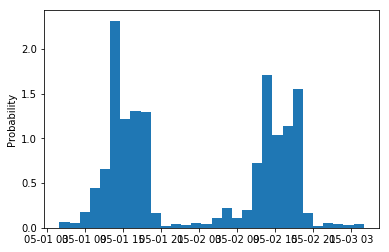

In [23]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = bigData_df['kTime'].as_matrix(columns=None)
plt.hist(x, normed=True, bins=30)
plt.ylabel('Probability');

In [24]:
x

array(['2018-05-01T05:00:00.000000000', '2018-05-01T05:00:00.000000000',
       '2018-05-01T05:00:00.000000000', ...,
       '2018-05-03T04:59:01.000000000', '2018-05-03T04:59:02.000000000',
       '2018-05-03T04:59:03.000000000'], dtype='datetime64[ns]')

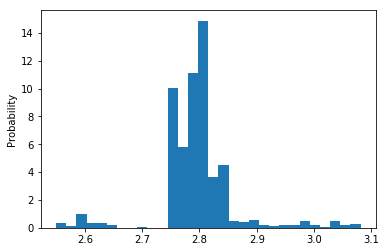

In [25]:
y = bigData_df['tPrice'].as_matrix(columns=None)
plt.hist(y, normed=True, bins=30)
plt.ylabel('Probability');

In [26]:
len(x)

90726

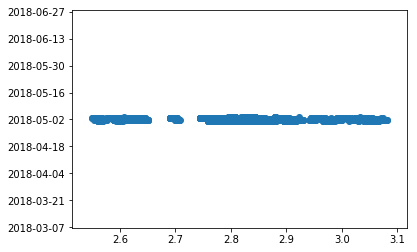

In [27]:
# Plot the data
plt.scatter(y,x)

In [28]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)

In [29]:
z = [x,y]

In [30]:
z

[array(['2018-05-01T05:00:00.000000000', '2018-05-01T05:00:00.000000000',
        '2018-05-01T05:00:00.000000000', ...,
        '2018-05-03T04:59:01.000000000', '2018-05-03T04:59:02.000000000',
        '2018-05-03T04:59:03.000000000'], dtype='datetime64[ns]'),
 array([2.812, 2.802, 2.776, ..., 2.88 , 2.804, 2.804])]

In [31]:
# Fit the model to the data
kmeans.fit(z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [32]:
# Predict the clusters
predicted_clusters = kmeans.predict(z)

In [33]:
predicted_clusters

array([0, 1], dtype=int32)

In [ ]:
# Plot the predicted clusters to see if the model predicted the correct clusters
# This is visual validation that the model was trained correctly.
# plt.scatter(x,y, c=predicted_clusters, s=50, cmap='viridis')

+++ Elastic Net

In [ ]:
bigData_df.columns

required fields

date
kTime
volumne
tPrice
ageOrder - difference of tTime and entryTime - replace entryDate column
dow - oneHot encoded
WeathermodelOutput (12 models, 9 days, 2 measurements/day) 216
ProductionmodelOutput (4 columns -  op_cap, schedule_cap, avail_cap, design_cap)

Run regression on time, volume, day. price


Create sample data

In [35]:
import pandas as pd
# sample_df = pd.read_csv('sampleData.csv')

In [ ]:
sample_df.head()

In [36]:
bigData_df.head()

,date,tTime,contractDelivery,volume,tPrice,entryDate,dow,month,kTime
30511,20180501,00:00:00,1807,1,2.812,20180501,Tuesday,5,2018-05-01 05:00:00
39321,20180501,00:00:00,1809,1,2.802,20180501,Tuesday,5,2018-05-01 05:00:00
867,20180501,00:00:00,1806,2,2.776,20180501,Tuesday,5,2018-05-01 05:00:00
868,20180501,00:00:00,1806,1,2.776,20180501,Tuesday,5,2018-05-01 05:00:00
870,20180501,00:00:00,1806,37,2.777,20180501,Tuesday,5,2018-05-01 05:00:00


In [ ]:
# df = pd.DataFrame()

In [37]:
bigData_df['ageOrder']=bigData_df['date']-bigData_df['entryDate']

In [38]:
bigData_df.head(10)

,date,tTime,contractDelivery,volume,tPrice,entryDate,dow,month,kTime,ageOrder
30511,20180501,00:00:00,1807,1,2.812,20180501,Tuesday,5,2018-05-01 05:00:00,0
39321,20180501,00:00:00,1809,1,2.802,20180501,Tuesday,5,2018-05-01 05:00:00,0
867,20180501,00:00:00,1806,2,2.776,20180501,Tuesday,5,2018-05-01 05:00:00,0
868,20180501,00:00:00,1806,1,2.776,20180501,Tuesday,5,2018-05-01 05:00:00,0
870,20180501,00:00:00,1806,37,2.777,20180501,Tuesday,5,2018-05-01 05:00:00,0
871,20180501,00:00:00,1806,1,2.778,20180501,Tuesday,5,2018-05-01 05:00:00,0
869,20180501,00:00:00,1806,3,2.776,20180501,Tuesday,5,2018-05-01 05:00:00,0
873,20180501,00:00:00,1806,1,2.777,20180501,Tuesday,5,2018-05-01 05:00:00,0
874,20180501,00:00:00,1806,1,2.778,20180501,Tuesday,5,2018-05-01 05:00:00,0
875,20180501,00:00:00,1806,1,2.777,20180501,Tuesday,5,2018-05-01 05:00:00,0


In [39]:
bigData_df.sort_values('ageOrder', ascending=False )

,date,tTime,contractDelivery,volume,tPrice,entryDate,dow,month,kTime,ageOrder
167,20180501,18:41:59,1806,1,2.767,20180430,Tuesday,5,2018-05-01 23:41:59,71
302,20180501,19:23:27,1806,7,2.771,20180430,Tuesday,5,2018-05-02 00:23:27,71
40849,20180501,19:28:01,1810,1,2.808,20180430,Tuesday,5,2018-05-02 00:28:01,71
313,20180501,19:27:41,1806,1,2.771,20180430,Tuesday,5,2018-05-02 00:27:41,71
42307,20180501,19:27:25,1811,1,2.851,20180430,Tuesday,5,2018-05-02 00:27:25,71
312,20180501,19:27:18,1806,1,2.771,20180430,Tuesday,5,2018-05-02 00:27:18,71
311,20180501,19:25:25,1806,1,2.771,20180430,Tuesday,5,2018-05-02 00:25:25,71
310,20180501,19:25:15,1806,2,2.771,20180430,Tuesday,5,2018-05-02 00:25:15,71
309,20180501,19:25:15,1806,3,2.771,20180430,Tuesday,5,2018-05-02 00:25:15,71
308,20180501,19:25:15,1806,1,2.771,20180430,Tuesday,5,2018-05-02 00:25:15,71


In [40]:
bigData_df.head()

,date,tTime,contractDelivery,volume,tPrice,entryDate,dow,month,kTime,ageOrder
30511,20180501,00:00:00,1807,1,2.812,20180501,Tuesday,5,2018-05-01 05:00:00,0
39321,20180501,00:00:00,1809,1,2.802,20180501,Tuesday,5,2018-05-01 05:00:00,0
867,20180501,00:00:00,1806,2,2.776,20180501,Tuesday,5,2018-05-01 05:00:00,0
868,20180501,00:00:00,1806,1,2.776,20180501,Tuesday,5,2018-05-01 05:00:00,0
870,20180501,00:00:00,1806,37,2.777,20180501,Tuesday,5,2018-05-01 05:00:00,0


+++ Elastic Net

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# Get Dummies
# tradeData = pd.get_dummies(bigData_df)
# tradeData.head()


In [ ]:
# tradeData.shape

In [ ]:
# bigData_df.loc[bigData_df['tTime'] == '10:12:27']

In [ ]:
# bigData_df.shape

In [ ]:
# new_df = bigData_df[bigData_df.tTime != '10:12:27']

In [42]:
new_df = bigData_df

In [43]:
new_df.head()

,date,tTime,contractDelivery,volume,tPrice,entryDate,dow,month,kTime,ageOrder
30511,20180501,00:00:00,1807,1,2.812,20180501,Tuesday,5,2018-05-01 05:00:00,0
39321,20180501,00:00:00,1809,1,2.802,20180501,Tuesday,5,2018-05-01 05:00:00,0
867,20180501,00:00:00,1806,2,2.776,20180501,Tuesday,5,2018-05-01 05:00:00,0
868,20180501,00:00:00,1806,1,2.776,20180501,Tuesday,5,2018-05-01 05:00:00,0
870,20180501,00:00:00,1806,37,2.777,20180501,Tuesday,5,2018-05-01 05:00:00,0


In [44]:
# Create a column for seconds to get around error with tTime and kTime

new_df['sec']=pd.to_timedelta(new_df.tTime).dt.total_seconds().astype(int)

In [45]:
new_df.head(100)

,date,tTime,contractDelivery,volume,tPrice,entryDate,dow,month,kTime,ageOrder,sec
30511,20180501,00:00:00,1807,1,2.812,20180501,Tuesday,5,2018-05-01 05:00:00,0,0
39321,20180501,00:00:00,1809,1,2.802,20180501,Tuesday,5,2018-05-01 05:00:00,0,0
867,20180501,00:00:00,1806,2,2.776,20180501,Tuesday,5,2018-05-01 05:00:00,0,0
868,20180501,00:00:00,1806,1,2.776,20180501,Tuesday,5,2018-05-01 05:00:00,0,0
870,20180501,00:00:00,1806,37,2.777,20180501,Tuesday,5,2018-05-01 05:00:00,0,0
871,20180501,00:00:00,1806,1,2.778,20180501,Tuesday,5,2018-05-01 05:00:00,0,0
869,20180501,00:00:00,1806,3,2.776,20180501,Tuesday,5,2018-05-01 05:00:00,0,0
873,20180501,00:00:00,1806,1,2.777,20180501,Tuesday,5,2018-05-01 05:00:00,0,0
874,20180501,00:00:00,1806,1,2.778,20180501,Tuesday,5,2018-05-01 05:00:00,0,0
875,20180501,00:00:00,1806,1,2.777,20180501,Tuesday,5,2018-05-01 05:00:00,0,0


In [46]:
# Assign X (data) and y (target) - missing tTime or kTime

X = new_df[['contractDelivery', 'volume', 'entryDate', 'month', 'ageOrder', 'sec']]
y = new_df["tPrice"].values.reshape(-1, 1)
print(X.shape, y.shape)

(90726, 6) (90726, 1)


In [47]:
# Split the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [48]:
import traceback

from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data


# X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)

try:
    X_scaler = StandardScaler().fit(X_train)
    y_scaler = StandardScaler().fit(y_train)
except Exception as e:
    print("type error: " + str(e))
    print(traceback.format_exc())
    


In [49]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)


In [50]:
# Create a LinearRegression model and fit it to the scaled training data

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

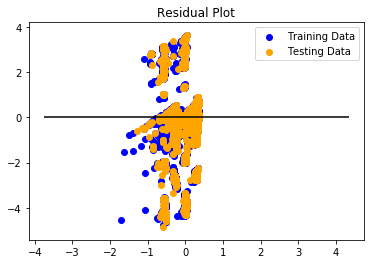

In [51]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [52]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)


print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9162640704358909, R2: 0.08495155481218297


In [53]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9745402794246465, R2: 0.026752661996018334


In [54]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9162640960322996, R2: 0.08495152924973348
